In [1]:
import seaborn as sns
import datetime
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
plays_df = pd.read_csv('plays.csv')

In [3]:
plays_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


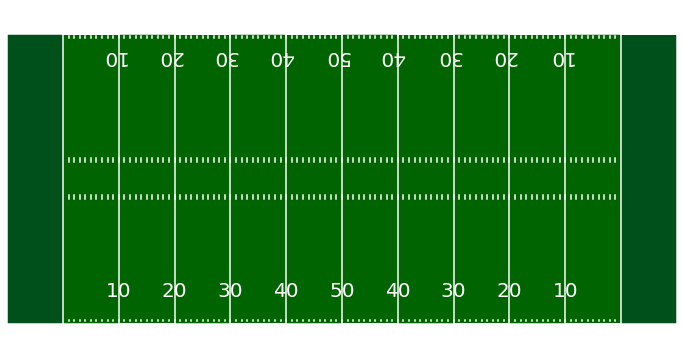

In [4]:
# Creating a football field
rectangle = patches.Rectangle((0,0), 120, 53.3, facecolor='darkgreen', zorder=0)

fig, ax = plt.subplots(1, figsize=(12, 6.33))

ax.add_patch(rectangle)

# Adding yard lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Adding the endzones
left_ez = patches.Rectangle((0,0), 10, 53.3, facecolor='darkblue', alpha=0.2, zorder=0)
right_ez = patches.Rectangle((110,0), 10, 53.3, facecolor='darkblue', alpha=0.2, zorder=0)

# Adding the patches to the plot
ax.add_patch(left_ez)
ax.add_patch(right_ez)

# Setting limits of x (0 to 120) and y axis (-5 to 58.3).
plt.xlim(0,120)
plt.ylim(-5,58.3)

# Removing axis values
plt.axis('off')

# Creating the yardage for each line
for x in range(20, 110, 10):

    # Intializing another variable named 'number'
    num = x

    # If x exceeds 50, subtract it from 120
    if x > 50:
        num = 120 - x

    # Plotting the text at the bottom
    plt.text(x, 5, str(num - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white')

    # Plotting the text at the top
    plt.text(x - 0.95, 53.3 - 5, str(num - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white',
             rotation=180)

# Ground markings
for x in range(11, 110):
    ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
    ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
    ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
    ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)

In [5]:
# Creating the above into a function
def create_football_field():
    
    # Create a rectangle defined via an anchor point *xy* and its *width* and *height*
    rectangle = patches.Rectangle((0,0), 120, 53.3, facecolor='darkgreen', zorder=0)
    
    # Creating a subplot to plot our field on
    fig, ax = plt.subplots(1, figsize=(12, 6.33))
    
    # Adding the rectangle to the plot
    ax.add_patch(rectangle)

    # Plotting a line plot for marking the field lines
    plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
              0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white', zorder = 0)

    # Creating the end-zonez
    left_ez = patches.Rectangle((0,0), 10, 53.3, facecolor='darkblue', alpha=0.2, zorder=0)
    right_ez = patches.Rectangle((110,0), 10, 53.3, facecolor='darkblue', alpha=0.2, zorder=0)

    # Adding the patches to the subplot
    ax.add_patch(left_ez)
    ax.add_patch(right_ez)

    # Setting the limits of x-axis from 0 to 120
    plt.xlim(0, 120)

    # Setting the limits of y-axis from -5 to 58.3
    plt.ylim(-5, 58.3)

    # Removing the axis values from the plot
    plt.axis('off')

    # Plotting the numbers starting from x = 20 and ending at x = 110
    # with a step of 10
    for x in range(20, 110, 10):

        # Intializing another variable named 'num'
        num = x

        # If x exceeds 50, subtract it from 120
        if x > 50:
            num = 120 - x

        # Plotting the text at the bottom
        plt.text(x, 5, str(num - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white')

        # Plotting the text at the top
        plt.text(x - 0.95, 53.3 - 5, str(num - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white',
                 rotation=180)

    # Making ground markings
    for x in range(11, 110):
            ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
            ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
            ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
            ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)
    
    # Returning the figure and axis
    return fig, ax

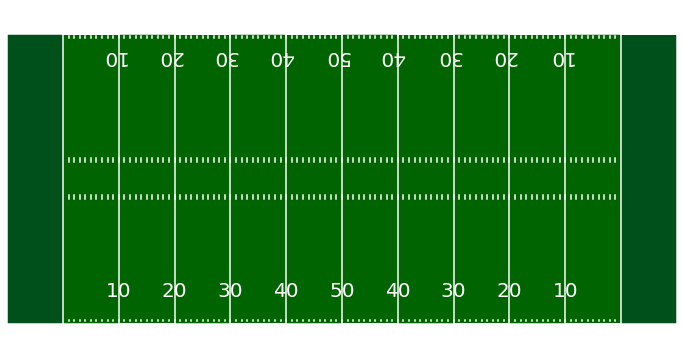

In [6]:
# Calling the function
fix, ax = create_football_field()

# Plotting the figure
plt.show()

In [7]:
# Bringing in football players
player_df = pd.read_csv('week_data.csv')
player_df

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-11-16T01:24:15.799Z,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,2018-11-16T01:24:15.799Z,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,2018-11-16T01:24:15.799Z,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,2018-11-16T01:24:15.799Z,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,2018-11-16T01:24:15.799Z,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932235,2018-11-20T04:57:59.700Z,55.30,41.04,4.81,1.60,0.49,250.40,241.72,None,2556593.0,Cory Littleton,58.0,ILB,118,home,2018111900,5577,left,NaN
932236,2018-11-20T04:57:59.700Z,86.77,41.67,1.21,0.10,0.12,263.32,216.71,None,2558125.0,Patrick Mahomes,15.0,QB,118,away,2018111900,5577,left,NaN
932237,2018-11-20T04:57:59.700Z,36.48,43.86,1.89,0.32,0.19,120.64,120.19,None,2558183.0,John Johnson,43.0,SS,118,home,2018111900,5577,left,NaN
932238,2018-11-20T04:57:59.700Z,84.26,28.11,1.73,0.54,0.17,260.29,249.13,None,2558830.0,Samson Ebukam,50.0,OLB,118,home,2018111900,5577,left,NaN


In [8]:
# To fix the date to fit the data frame
player_df['time'] = pd.to_datetime(player_df['time']).dt.time

In [10]:
# Sort values by time
player_df = player_df.sort_values(by='time', ascending=True).reset_index(drop=True)

In [12]:
sel_df = player_df.query('gameId ==2018111900 and playId == 5577')
sel_df

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
282518,04:57:48,85.23,30.44,0.00,0.00,0.01,265.65,337.88,None,2555478.0,Demarcus Robinson,11.0,WR,1,away,2018111900,5577,left,GO
282519,04:57:48,78.45,35.05,0.09,0.28,0.01,156.33,52.58,None,1037374.0,Sam Shields,37.0,CB,1,home,2018111900,5577,left,NaN
282520,04:57:48,89.05,20.95,0.00,0.00,0.01,315.54,346.29,None,2540204.0,Spencer Ware,32.0,RB,1,away,2018111900,5577,left,FLAT
282521,04:57:48,85.69,18.20,0.00,0.00,0.00,358.73,346.17,None,2540258.0,Travis Kelce,87.0,TE,1,away,2018111900,5577,left,FLAT
282522,04:57:48,67.72,26.70,1.49,0.43,0.15,113.66,269.62,None,2543492.0,Lamarcus Joyner,20.0,FS,1,home,2018111900,5577,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284283,04:57:59.700000,55.30,41.04,4.81,1.60,0.49,250.40,241.72,None,2556593.0,Cory Littleton,58.0,ILB,118,home,2018111900,5577,left,NaN
284284,04:57:59.700000,71.73,48.32,3.57,1.46,0.36,236.68,232.58,None,2552652.0,Chris Conley,17.0,WR,118,away,2018111900,5577,left,FLAT
284285,04:57:59.700000,40.20,42.86,4.35,1.81,0.44,156.95,127.83,None,2556214.0,Tyreek Hill,10.0,WR,118,away,2018111900,5577,left,GO
284286,04:57:59.700000,53.85,50.74,1.74,3.88,0.18,192.85,333.91,None,2555478.0,Demarcus Robinson,11.0,WR,118,away,2018111900,5577,left,GO


In [14]:
# Selecting teams
home_t = sel_df.query('team == "home"')
away_t = sel_df.query('team=="away"')

# Selecting the football
football = sel_df.query('team == "football"')

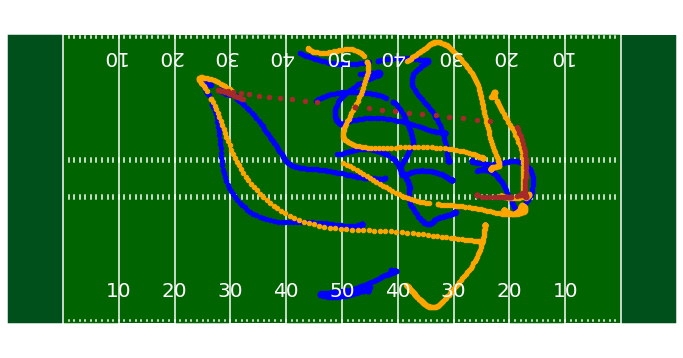

In [18]:
# Call the create_football_field function
fig, ax = create_football_field()

# Plotting the home team
home_t.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_t.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

plt.show()

In [19]:
sel_df['event'].unique()

array(['None', 'ball_snap', 'first_contact', 'pass_forward',
       'pass_outcome_interception', 'tackle'], dtype=object)

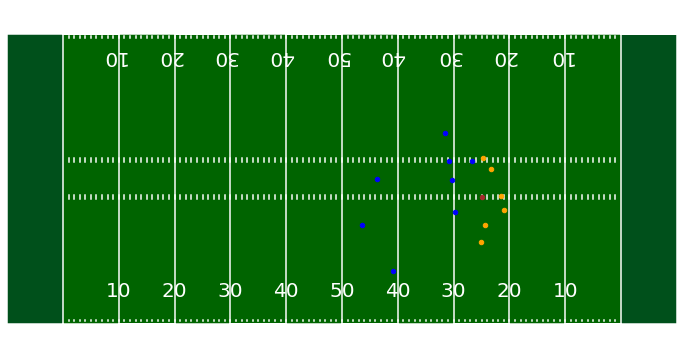

In [21]:
#To show where the quarterbacks received the ball

fig, ax = create_football_field()

# Plotitng the home team
home_t.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_t.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

# Displaying the plot
plt.show()